## Data Pre-processing

## Importing dataset as a Dataframe

In [1]:
import pandas as pd

# Try loading the dataset
df = pd.read_csv('labeled_data.csv')
df.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


## Cleaning column 'tweet' to remove unnecessary characters and stop words

In [2]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download required NLTK data files
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab') # Download the 'punkt_tab' data package

# Initialize stopwords and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Define tweet cleaning function
def clean_tweet(text):
    text = text.lower()
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    text = re.sub(r'@\w+|#\w+', '', text)
    text = re.sub(r'\brt\b', '', text)
    text = re.sub(r'[^a-z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    tokens = [lemmatizer.lemmatize(word) for word in word_tokenize(text) if word not in stop_words]
    return ' '.join(tokens)

# Apply cleaning function and overwrite original tweet column
df['tweet'] = df['tweet'].apply(clean_tweet)

# Show cleaned tweets
df['tweet'].head()

[nltk_data] Downloading package punkt to /Users/mrudula/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mrudula/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/mrudula/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/mrudula/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


0    woman shouldnt complain cleaning house amp man...
1     boy dat coldtyga dwn bad cuffin dat hoe st place
2         dawg ever fuck bitch start cry confused shit
3                                     look like tranny
4       shit hear might true might faker bitch told ya
Name: tweet, dtype: object

## Reviewing the basic dataset information for analysis

In [3]:
if 'Unnamed: 0' in df.columns:
    df = df.drop(columns=['Unnamed: 0'])
else:
    print("'Unnamed: 0' column not found — nothing to drop.")

In [4]:
# Display basic info
basic_info = {
    "Shape": df.shape,
    "Columns": df.columns.tolist(),
    "Data Types": df.dtypes.to_dict(),
    "Missing Values (count)": df.isnull().sum().to_dict(),
    "Duplicate Rows": df.duplicated().sum()
}

basic_info

{'Shape': (24783, 6),
 'Columns': ['count',
  'hate_speech',
  'offensive_language',
  'neither',
  'class',
  'tweet'],
 'Data Types': {'count': dtype('int64'),
  'hate_speech': dtype('int64'),
  'offensive_language': dtype('int64'),
  'neither': dtype('int64'),
  'class': dtype('int64'),
  'tweet': dtype('O')},
 'Missing Values (count)': {'count': 0,
  'hate_speech': 0,
  'offensive_language': 0,
  'neither': 0,
  'class': 0,
  'tweet': 0},
 'Duplicate Rows': 714}

## Exploratory Data Analysis

## Plotting distribution of Characters and words in the dataset

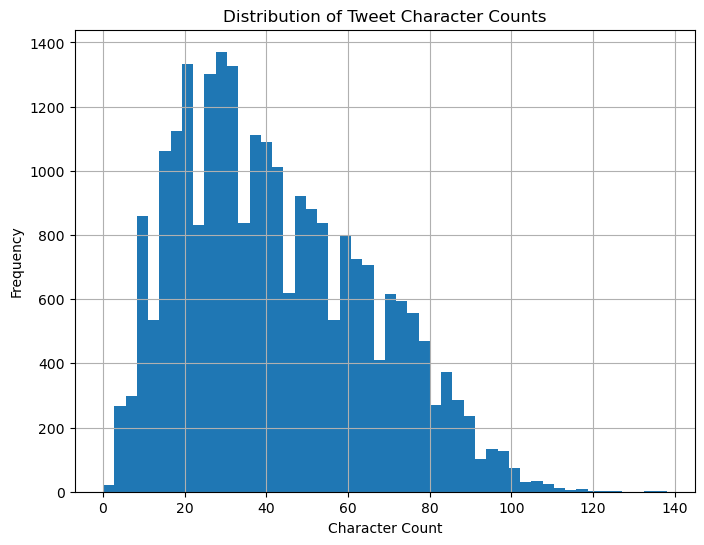

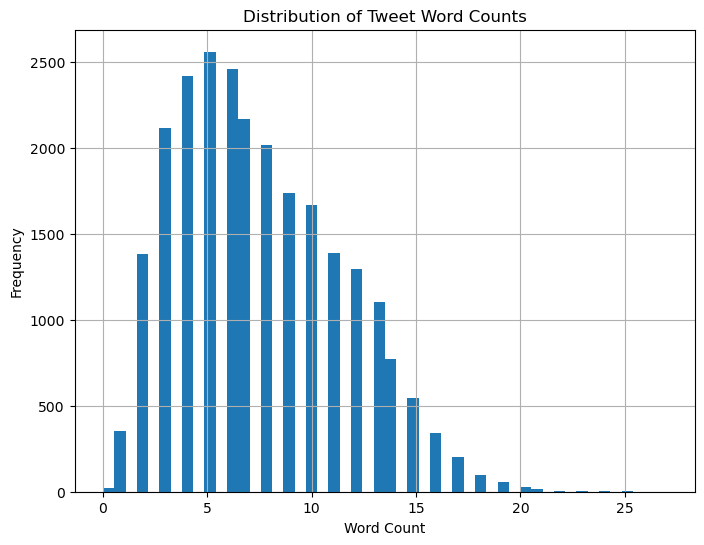

({'Character Count': {'count': 24783.0,
   'mean': 42.57684703223984,
   'std': 22.981447671642844,
   'min': 0.0,
   '25%': 24.0,
   '50%': 39.0,
   '75%': 59.0,
   'max': 138.0},
  'Word Count': {'count': 24783.0,
   'mean': 7.568938385183392,
   'std': 3.9143231784048753,
   'min': 0.0,
   '25%': 4.0,
   '50%': 7.0,
   '75%': 10.0,
   'max': 27.0}},
 '',
 'brrr hoe dichter bij het sint gebeuren hoe racistischer de drek op twitter en het komt nagenoeg alleen van de prozwartepieten hoek engvolk')

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Focus only on necessary columns
df = df[['tweet', 'class']]

# Text length in characters
df['char_count'] = df['tweet'].apply(len)

# Text length in words
df['word_count'] = df['tweet'].apply(lambda x: len(x.split()))

# Text profiling statistics
text_profile = {
    "Character Count": df['char_count'].describe().to_dict(),
    "Word Count": df['word_count'].describe().to_dict()
}

# Plotting histograms
plt.figure(figsize=(8,6))
plt.hist(df['char_count'], bins=50)
plt.title('Distribution of Tweet Character Counts')
plt.xlabel('Character Count')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

plt.figure(figsize=(8,6))
plt.hist(df['word_count'], bins=50)
plt.title('Distribution of Tweet Word Counts')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Examples: Shortest and Longest tweets
shortest_tweet = df.loc[df['char_count'].idxmin(), 'tweet']
longest_tweet = df.loc[df['char_count'].idxmax(), 'tweet']

text_profile, shortest_tweet, longest_tweet


## Checking the distribution of different classes: 

## Class 0 - Hate, Class 1 - Offensive, Class 2 - Neither

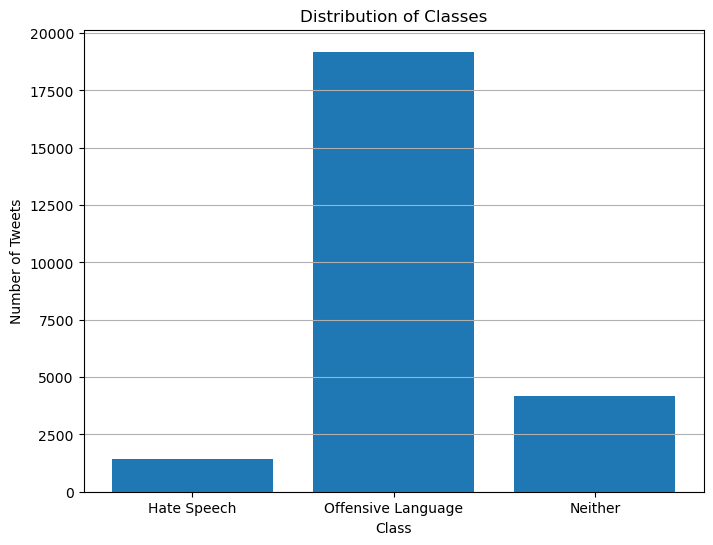

(class
 0     1430
 1    19190
 2     4163
 Name: count, dtype: int64,
 class
 0     5.770084
 1    77.432111
 2    16.797805
 Name: count, dtype: float64)

In [6]:
# Label distribution
label_counts = df['class'].value_counts().sort_index()

# Mapping the class numbers to their meaning
label_mapping = {0: 'Hate Speech', 1: 'Offensive Language', 2: 'Neither'}
label_names = [label_mapping[label] for label in label_counts.index]

# Plotting
plt.figure(figsize=(8,6))
plt.bar(label_names, label_counts.values)
plt.title('Distribution of Classes')
plt.xlabel('Class')
plt.ylabel('Number of Tweets')
plt.grid(axis='y')
plt.show()

# Proportion
label_proportion = (label_counts / df.shape[0]) * 100

label_counts, label_proportion

## Plotting a word cloud to review the most common Offensive and Hate Words

  Using cached wordcloud-1.9.4-cp312-cp312-macosx_11_0_arm64.whl.metadata (3.4 kB)
Using cached wordcloud-1.9.4-cp312-cp312-macosx_11_0_arm64.whl (168 kB)


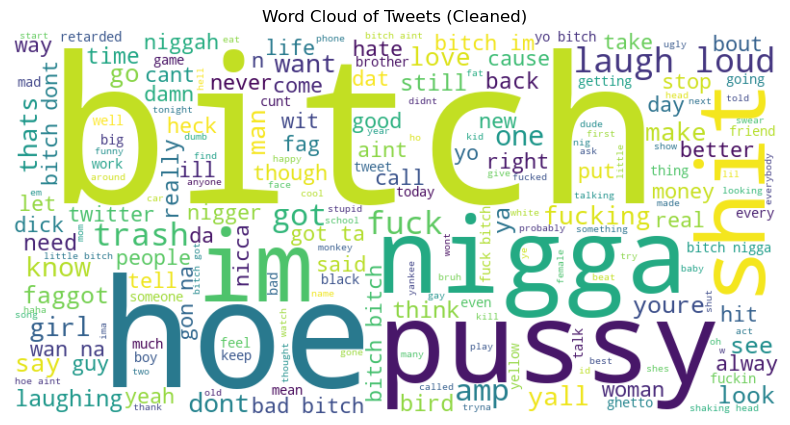

[('bitch', 11305),
 ('hoe', 4274),
 ('like', 2819),
 ('pussy', 2201),
 ('im', 2089),
 ('nigga', 1988),
 ('dont', 1781),
 ('got', 1601),
 ('get', 1536),
 ('fuck', 1447),
 ('shit', 1279),
 ('aint', 1169),
 ('trash', 1147),
 ('laugh', 1106),
 ('loud', 1091),
 ('know', 925),
 ('amp', 844),
 ('one', 751),
 ('love', 749),
 ('girl', 694)]

In [7]:
! pip install wordcloud


from collections import Counter
import re
from wordcloud import WordCloud

slang_dict = {
    "u": "you",
    "r": "are",
    "ur": "your",
    "thx": "thanks",
    "idk": "I don't know",
    "idc": "I don't care",
    "btw": "by the way",
    "b4": "before",
    "smh": "shaking my head",
    "fyi": "for your information",
    "imo": "in my opinion",
    "imho": "in my humble opinion",
    "lmao": "laughing my ass off",
    "lol": "laugh out loud",
    "omg": "oh my god",
    "rofl": "rolling on the floor laughing",
    "brb": "be right back",
    "g2g": "got to go",
    "wtf": "what the heck",
    "wth": "what the heck",
    "omfg": "oh my freaking god",
    "nah": "no",
    "yea": "yeah",
    "yolo": "you only live once",
    "lit": "amazing",
    "dope": "cool",
    "wanna": "want to",
    "gonna": "going to",
    "gotta": "got to",
    "lemme": "let me",
    "ain't": "is not",
    "can't": "cannot",
    "could've": "could have",
    "should've": "should have",
    "would've": "would have",
    "gimme": "give me",
    "gotcha": "got you",
    "kinda": "kind of",
    "sorta": "sort of",
    "y'all": "you all",
    "cuz": "because",
    "coz": "because",
    "pls": "please",
    "plz": "please",
    "thru": "through",
    "tho": "though",
    "prolly": "probably",
    "bff": "best friends forever",
    "nvm": "never mind",
    "tbh": "to be honest",
    "ikr": "I know, right",
    "jk": "just kidding",
    "rn": "right now",
    "hmu": "hit me up",
    "fml": "freak my life",
    "stfu": "shut the heck up",
    "af": "as heck",
    "asap": "as soon as possible",
    "irl": "in real life",
    "np": "no problem",
    "ty": "thank you",
    "gg": "good game",
    "ez": "easy",
    "sus": "suspicious",
    "rly": "really",
    "gr8": "great",
    "b4n": "bye for now",
    "cya": "see you",
    "idgaf": "I don't give a freak",
    "tf": "the heck",
    "bby": "baby",
    "bae": "before anyone else",
    "fwb": "friends with benefits",
    "nsfw": "not safe for work",
    "tldr": "too long; didn't read",
    "lmk": "let me know",
    "wyd": "what are you doing",
    "btw": "by the way",
    "ttyl": "talk to you later",
    "ffs": "for freak's sake",
    "ftw": "for the win",
    "cu": "see you",
    "luv": "love",
    "b": "be",
    "omw": "on my way",
    "bro": "brother",
    "sis": "sister",
    "chill": "relax",
    "srs": "serious",
    "h8": "hate",
    "ikr": "I know, right"
}

# Text cleaning function with stop words removal and sland dictionary replacement
def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+", "", text)   # remove URLs
    text = re.sub(r"@\w+", "", text)       # remove mentions
    text = re.sub(r"#\w+", "", text)       # remove hashtags
    text = re.sub(r"[^a-z\s]", "", text)   # remove special characters
    text = re.sub(r"\s+", " ", text)       # collapse extra whitespace
    # replace slang
    text = " ".join(slang_dict.get(word, word) for word in text.split())
    tokens = [lemmatizer.lemmatize(word) for word in word_tokenize(text) if word not in stop_words]
    return ' '.join(tokens)

# Cleaned version of tweets
df['clean_tweet'] = df['tweet'].apply(clean_text)

# Generate top unigrams (single words)
all_words = ' '.join(df['clean_tweet']).split()
word_freq = Counter(all_words)
most_common_words = word_freq.most_common(20)

# Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['clean_tweet']))

# Plotting word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Tweets (Cleaned)')
plt.show()

most_common_words


## Checking the Top Two-word and Three-word most common Hate and Offensive Phrases

In [8]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Function to get top n-grams
def get_top_ngrams(corpus, ngram_range=(2,2), n=None):
    vec = CountVectorizer(ngram_range=ngram_range, stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

# Assuming your cleaned tweets are in 'clean_tweet' column
top_bigrams = get_top_ngrams(df['clean_tweet'], ngram_range=(2,2), n=20)
top_trigrams = get_top_ngrams(df['clean_tweet'], ngram_range=(3,3), n=20)

# Convert into DataFrame
bigrams_df = pd.DataFrame(top_bigrams, columns=['Bigram', 'Frequency'])
trigrams_df = pd.DataFrame(top_trigrams, columns=['Trigram', 'Frequency'])

# Display the tables
print("\nTop 20 Bigrams:\n")
print(bigrams_df)

print("\nTop 20 Trigrams:\n")
print(trigrams_df)



Top 20 Bigrams:

          Bigram  Frequency
0     laugh loud       1064
1         wan na        341
2      bad bitch        327
3         got ta        309
4         gon na        293
5      look like        272
6     like bitch        264
7    bitch nigga        216
8     bitch dont        201
9     fuck bitch        198
10    bitch like        193
11      yo bitch        193
12  shaking head        184
13      bitch im        172
14    bitch aint        161
15     bitch got        149
16      hoe aint        149
17  little bitch        138
18     dont know        114
19    dumb bitch        112

Top 20 Trigrams:

               Trigram  Frequency
0     bitch laugh loud        103
1       hoe aint loyal         68
2            im gon na         52
3       hoe laugh loud         51
4         bitch wan na         44
5      bitch look like         41
6          dont wan na         35
7     laugh loud bitch         34
8        dont love hoe         33
9         bitch got ta         29
1

## Plotting Distribution of Characters and Words by Class and Plotting Distribution of Top 20 words for each Class

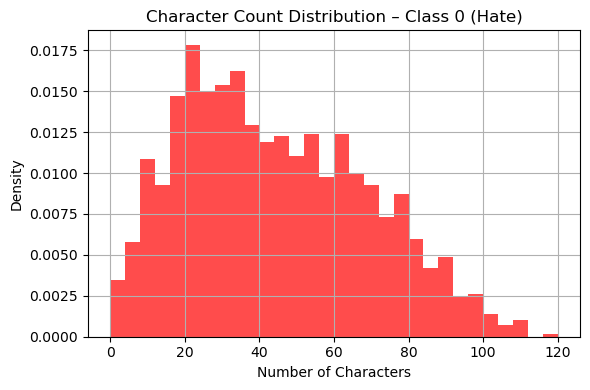

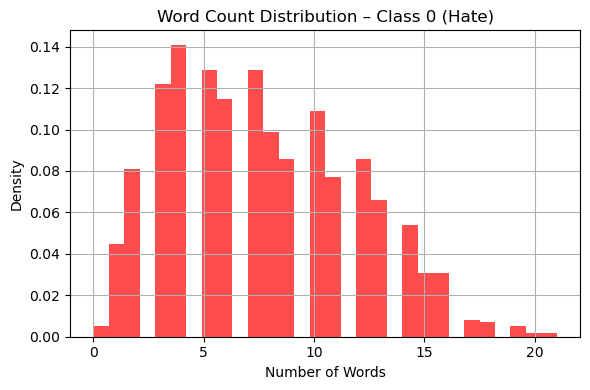

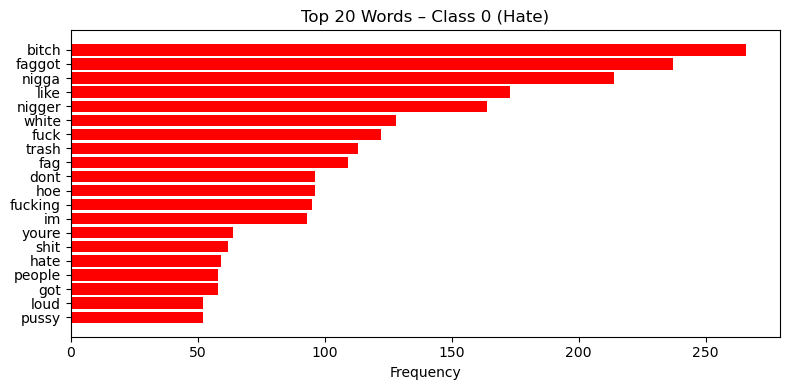

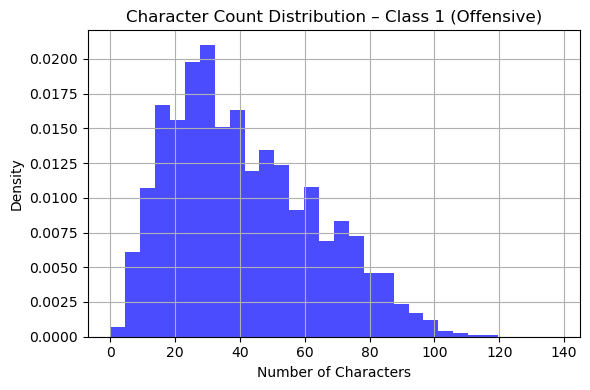

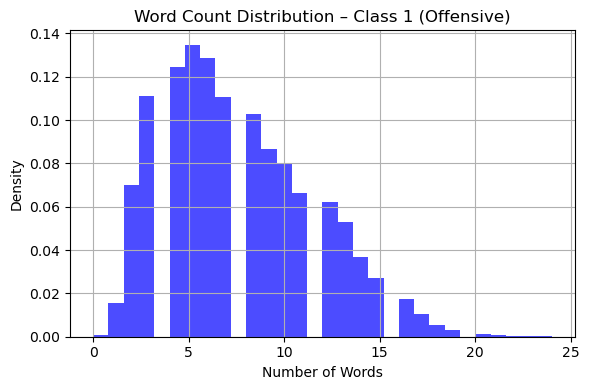

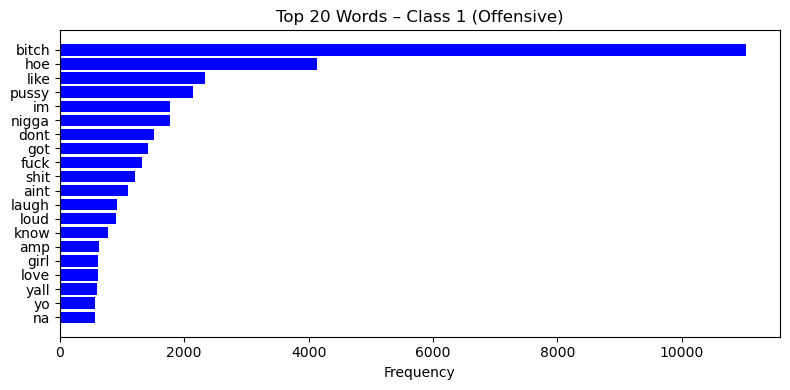

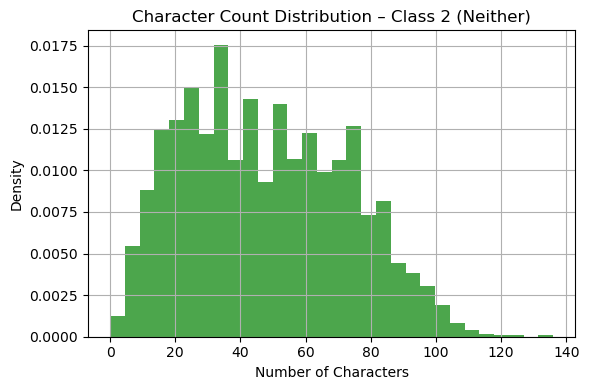

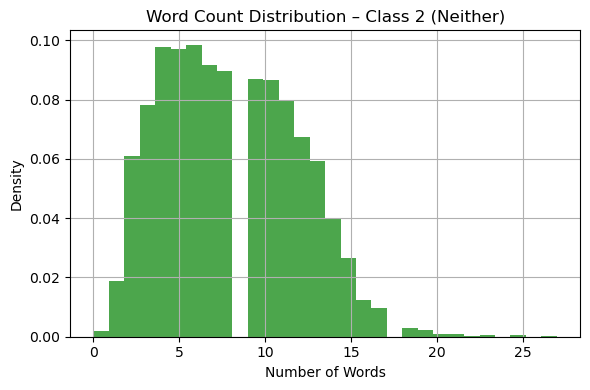

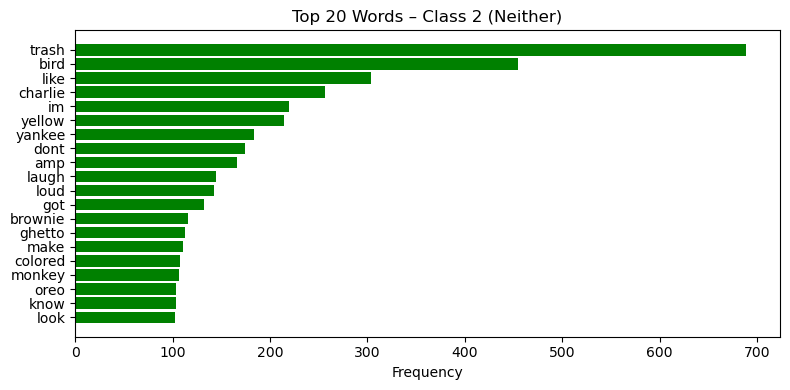

In [9]:
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

# Mapping from numeric class labels to descriptive names
label_mapping = {
    0: 'Hate',
    1: 'Offensive',
    2: 'Neither'
}

# Color assigned to each class for visualization
colors = {
    0: 'red',
    1: 'blue',
    2: 'green'
}

# Loop over each class label
for label in [0, 1, 2]:
    class_name = label_mapping[label]
    color = colors[label]

    # Select only the rows belonging to this class
    subset = df[df['class'] == label]

    # ---------------------------
    # 1. Character Count Histogram
    # ---------------------------
    plt.figure(figsize=(6, 4))
    plt.hist(
        subset['char_count'],
        bins=30,
        color=color,
        alpha=0.7,
        density=True
    )
    plt.title(f'Character Count Distribution – Class {label} ({class_name})')
    plt.xlabel('Number of Characters')
    plt.ylabel('Density')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # ---------------------------
    # 2. Word Count Histogram
    # ---------------------------
    plt.figure(figsize=(6, 4))
    plt.hist(
        subset['word_count'],
        bins=30,
        color=color,
        alpha=0.7,
        density=True
    )
    plt.title(f'Word Count Distribution – Class {label} ({class_name})')
    plt.xlabel('Number of Words')
    plt.ylabel('Density')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # ---------------------------
    # 3. Top 20 Words Bar Chart
    # ---------------------------
    # Vectorize the text of this class
    vectorizer = CountVectorizer(stop_words='english')
    word_matrix = vectorizer.fit_transform(subset['clean_tweet'])

    # Sum up the word counts for each term
    word_frequencies = word_matrix.sum(axis=0).A1
    terms = vectorizer.get_feature_names_out()

    # Identify the indices of the top 20 most frequent terms
    top_indices = word_frequencies.argsort()[::-1][:20]

    # Plot a horizontal bar chart of term frequencies
    plt.figure(figsize=(8, 4))
    plt.barh(
        terms[top_indices][::-1],
        word_frequencies[top_indices][::-1],
        color=color
    )
    plt.title(f'Top 20 Words – Class {label} ({class_name})')
    plt.xlabel('Frequency')
    plt.tight_layout()
    plt.show()

## Plotting Wordclouds for top words by Class 

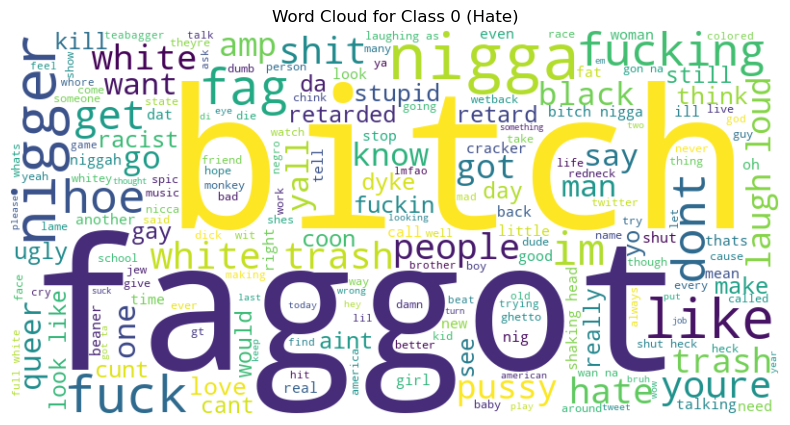

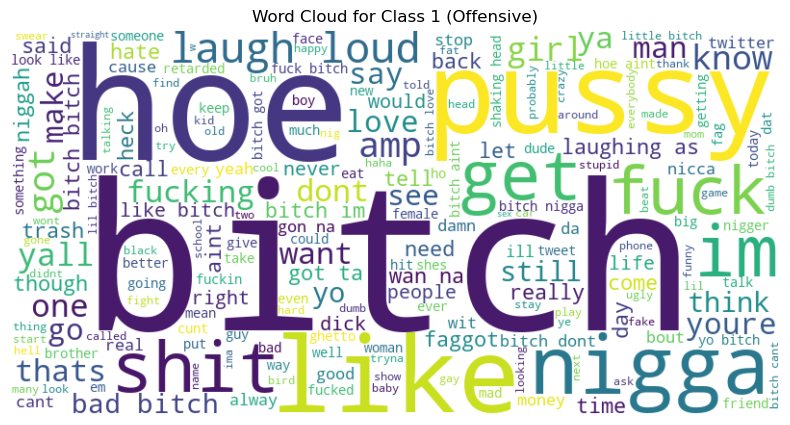

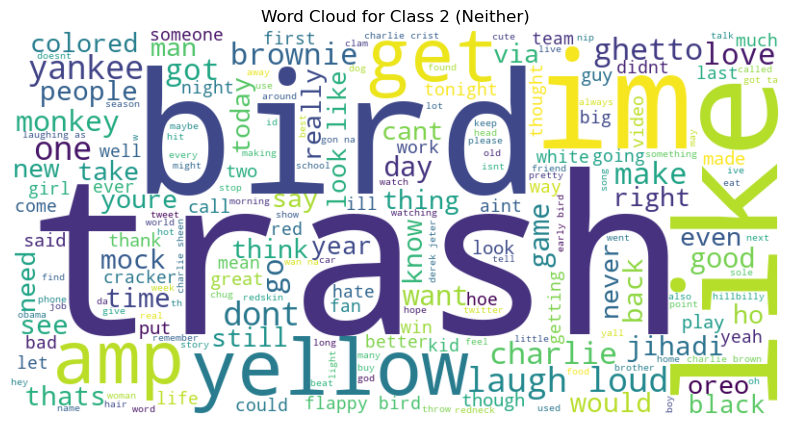

In [10]:
# Generate word clouds for each class separately

# Create a figure for each class
for label in [0, 1, 2]:
    subset = df[df['class'] == label]
    text = ' '.join(subset['clean_tweet'])

    wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords='english').generate(text)

    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for Class {label} ({label_mapping[label]})')
    plt.show()


## Word Count Distribution by Class

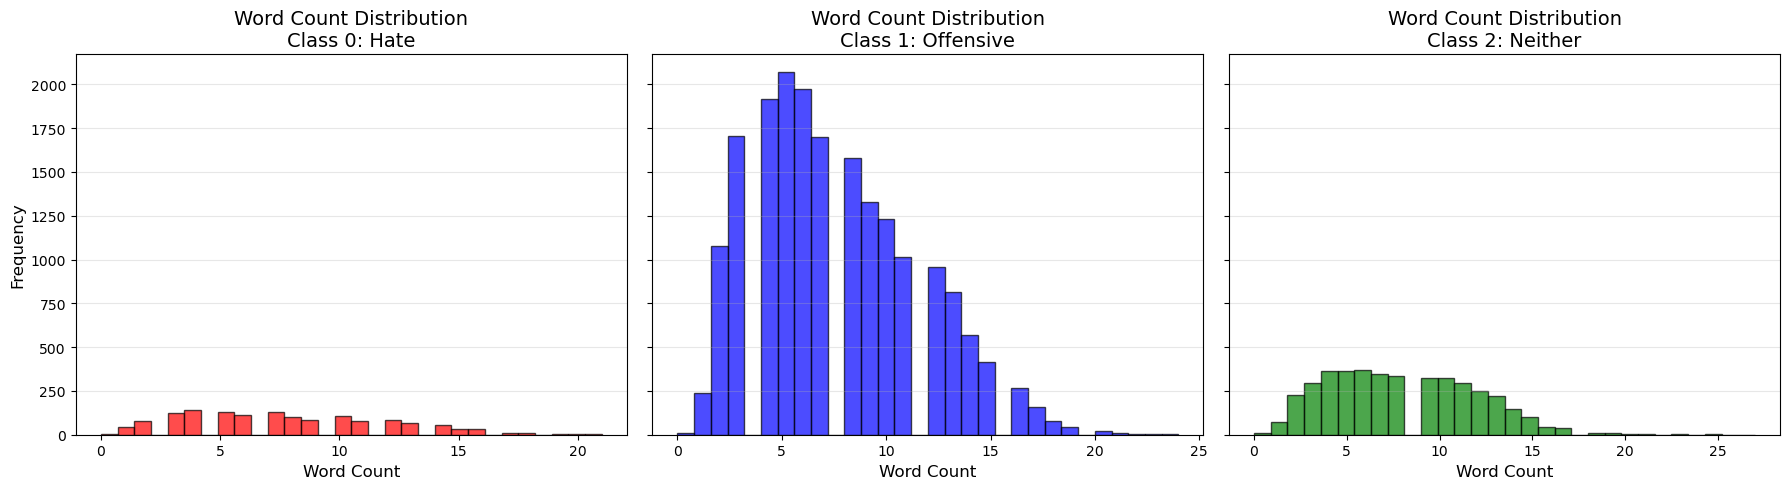

In [11]:
import matplotlib.pyplot as plt

# 3 separate histograms of word_count, one per class
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

for ax, label in zip(axes, [0, 1, 2]):
    # filter to this class
    subset = df[df['class'] == label]
    class_name = label_mapping[label]      # e.g. 'Hate'
    color = colors[label]                 # your palette

    # plot histogram
    ax.hist(
        subset['word_count'],
        bins=30,
        color=color,
        edgecolor='black',
        alpha=0.7,
        density=False
    )

    # titles and labels
    ax.set_title(f'Word Count Distribution\nClass {label}: {class_name}', fontsize=14)
    ax.set_xlabel('Word Count', fontsize=12)
    if label == 0:
        ax.set_ylabel('Frequency', fontsize=12)
    ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

## Boxplots and Density plots for Character Distribution by Class and a Feature Correlation Heatmap

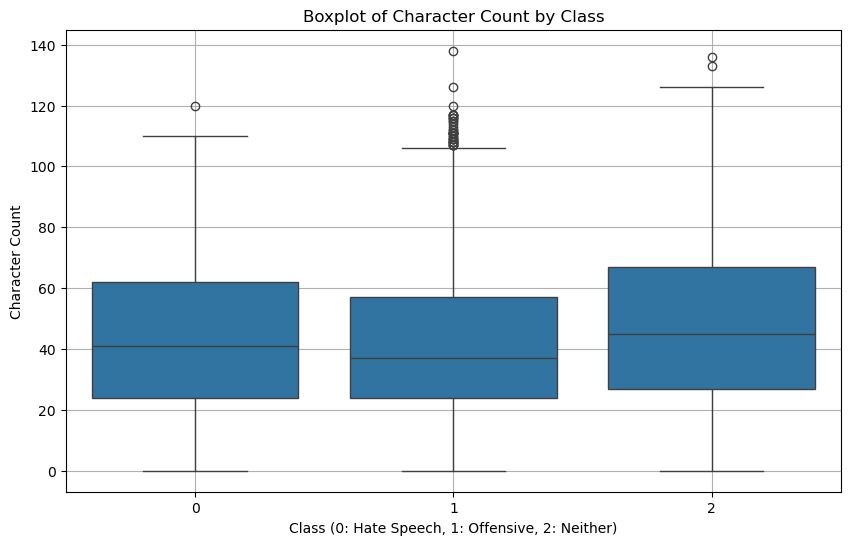

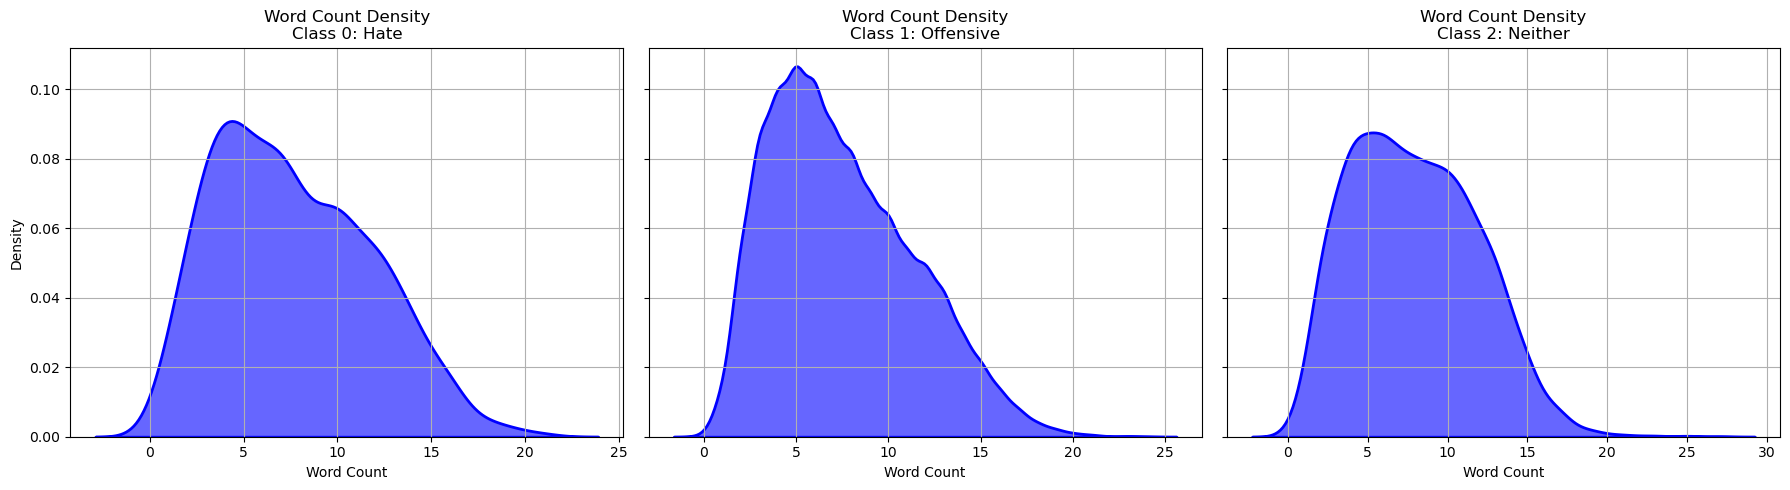

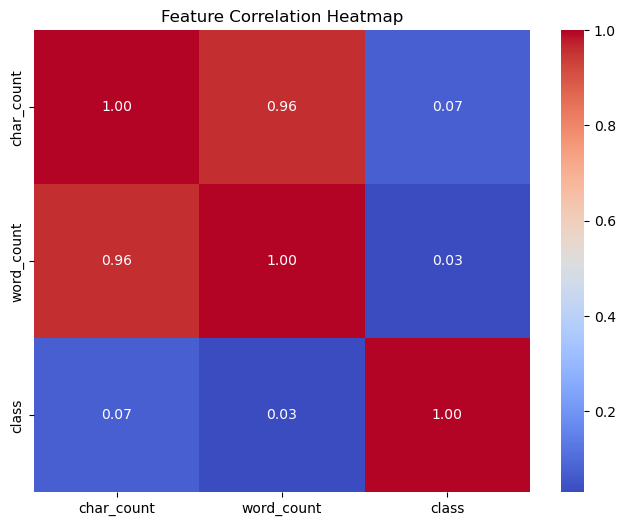

,char_count,word_count,class
0,64,10,2
1,48,10,1
2,44,8,1
3,16,3,1
4,46,9,1


In [12]:
import seaborn as sns

# Step 1: Boxplot of Tweet Lengths (character count) by Class
plt.figure(figsize=(10,6))
sns.boxplot(x='class', y='char_count', data=df)
plt.title('Boxplot of Character Count by Class')
plt.xlabel('Class (0: Hate Speech, 1: Offensive, 2: Neither)')
plt.ylabel('Character Count')
plt.grid(True)
plt.show()

# Step 2: Density Plot (KDE) of Tweet Word Counts by Class
# Mapping numeric labels to descriptive class names
label_mapping = {
    0: 'Hate',
    1: 'Offensive',
    2: 'Neither'
}

# Create a single figure with 3 separate subplots (side by side)
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5), sharey=True)

for ax, label in zip(axes, [0, 1, 2]):
    class_name = label_mapping[label]
    subset = df[df['class'] == label]

    # Plot the KDE for this class on its own axis
    sns.kdeplot(
        data=subset,
        x='word_count',
        fill=True,
        color='blue',
        alpha=0.6,
        linewidth=2,
        ax=ax
    )

    # Annotate each subplot
    ax.set_title(f'Word Count Density\nClass {label}: {class_name}')
    ax.set_xlabel('Word Count')
    ax.set_ylabel('Density')
    ax.grid(True)

# Adjust layout so subplots don't overlap
plt.tight_layout()
plt.show()

# Step 3: Feature Engineering (numeric features)
feature_df = df[['char_count', 'word_count', 'class']]

# Step 4: Correlation Heatmap
corr_matrix = feature_df.corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()

feature_df.head()


## Comparing the Total Tweets and Total Votes by Class

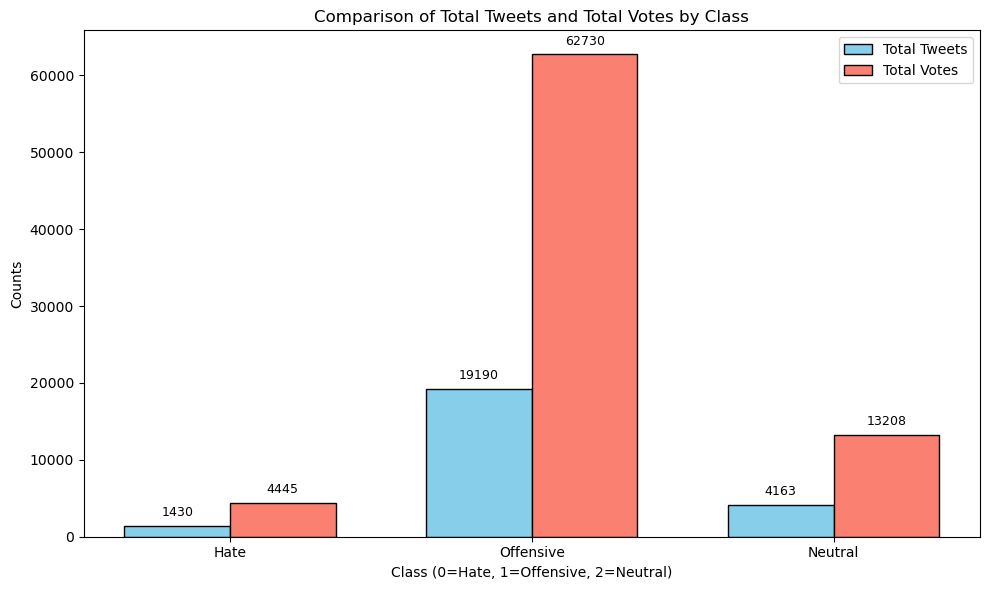

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
df = pd.read_csv('labeled_data.csv')

# Step 1: Calculate totals
grouped = df.groupby('class').agg(total_tweets=('tweet', 'count'), total_votes=('count', 'sum')).reset_index()

# Step 2: Plotting
x = np.arange(len(grouped['class']))  # label locations
width = 0.35  # width of the bars

fig, ax = plt.subplots(figsize=(10,6))

# Bars
tweets_bar = ax.bar(x - width/2, grouped['total_tweets'], width,
                    label='Total Tweets', color='skyblue', edgecolor='black')
votes_bar = ax.bar(x + width/2, grouped['total_votes'], width,
                   label='Total Votes', color='salmon', edgecolor='black')

# Labels, Title, Ticks
ax.set_xlabel('Class (0=Hate, 1=Offensive, 2=Neutral)')
ax.set_ylabel('Counts')
ax.set_title('Comparison of Total Tweets and Total Votes by Class')
ax.set_xticks(x)
ax.set_xticklabels(['Hate', 'Offensive', 'Neutral'])
ax.legend()

# Annotate the bars
for bars in [tweets_bar, votes_bar]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{int(height)}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 5),  # vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=9)

# Layout
plt.tight_layout()
plt.show()


## Annotator Vote Distribution Grouped by Final Class

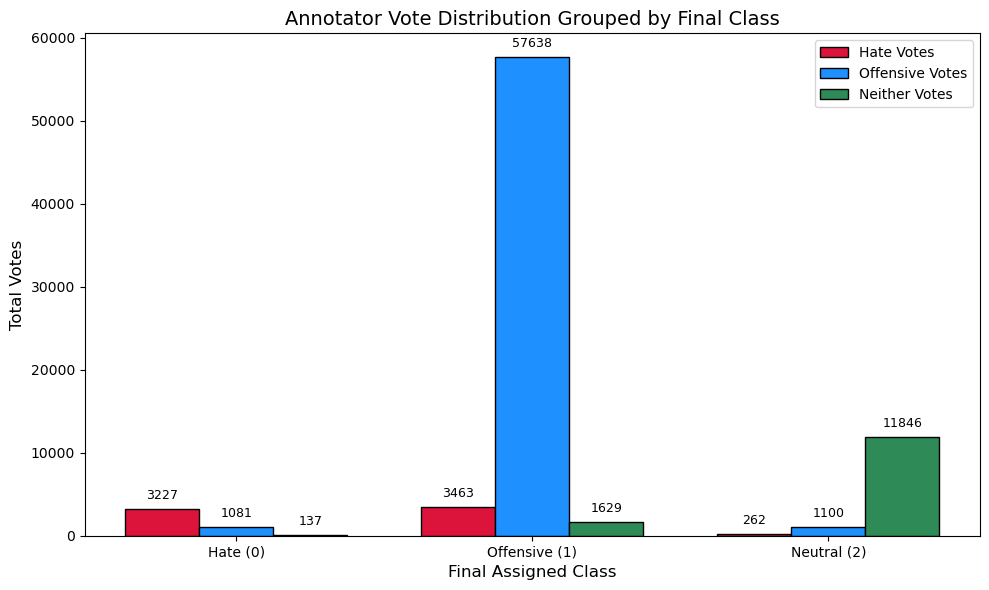

In [17]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np

# Define class labels and vote types with corresponding colors
classes = ['Hate (0)', 'Offensive (1)', 'Neutral (2)']
vote_types = ['hate', 'offensive', 'neither']
colors = {
    'hate': 'crimson',
    'offensive': 'dodgerblue',
    'neither': 'seagreen'
}

# Prepare the votes data
votes = []
for cls in [0, 1, 2]:
    row = df[df['class'] == cls]
    votes.append([
        row['hate_speech'].sum(),
        row['offensive_language'].sum(),
        row['neither'].sum()
    ])

# Convert to numpy array for easy indexing
votes = np.array(votes)

# Set up bar positions and width
x = np.arange(len(classes))  # Class positions
width = 0.25  # Width of each bar

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot bars for each vote type
for i, vote_type in enumerate(vote_types):
    bars = ax.bar(x + i * width, votes[:, i], width,
                  label=vote_type.capitalize() + ' Votes',
                  color=colors[vote_type], edgecolor='black')

    # Annotate each bar with its height
    for rect in bars:
        height = rect.get_height()
        ax.annotate(f'{int(height)}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 5),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=9)

# Add labels, title, and legend
ax.set_title('Annotator Vote Distribution Grouped by Final Class', fontsize=14)
ax.set_xlabel('Final Assigned Class', fontsize=12)
ax.set_ylabel('Total Votes', fontsize=12)
ax.set_xticks(x + width)
ax.set_xticklabels(classes)
ax.legend()

# Final layout adjustment
plt.tight_layout()
plt.show()
